### Standardization performs the following:
- Converts the Mean (μ) to 0
- Converts to S.D. (σ) to 1

### Z-Score = (Current_value – Mean) / Standard Deviation.


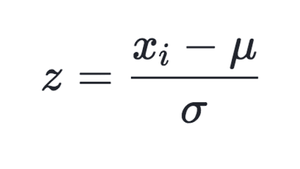

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### readind the csv file

In [19]:
df=pd.read_csv('Social_Network_Ads.csv')

In [20]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [21]:
df=df.iloc[:,2:]

In [22]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


#### train test split

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),
                                               df['Purchased'],
                                               test_size=0.3,
                                               random_state=0)

X_train.shape,X_test.shape

((280, 2), (120, 2))

## Standard Scalar

In [30]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()

#fit the scalar to the train set , it will learn the parameters like mean,standard deviation
scalar.fit(X_train)
# scalar learns only from the training data however we need to transform both training data and test data

#X_train_scaled=scalar.fit_transform(X_train)  # return type of fit_transform is numpy
#X_test_scaled=scalar.fit_transform(X_test)    # return type of fit_transform is numpy

# we will directly transform numpy array to dataframe for better visual understanding
X_train_scaled=pd.DataFrame(scalar.fit_transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(scalar.fit_transform(X_test),columns=X_test.columns)


In [25]:
scalar.mean_   #mean

array([3.78642857e+01, 6.98071429e+04])

In [31]:
X_test_scaled

,Age,EstimatedSalary
0,-0.648073,0.530803
1,0.075357,-0.597376
2,-0.195929,0.164907
3,-0.648073,0.286873
4,-0.195929,-0.597376
...,...,...
115,1.070073,-0.140006
116,0.708358,1.872421
117,-0.557644,0.591786
118,0.798787,0.378347


#### plotting KDE for checking mean and standard deviation

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

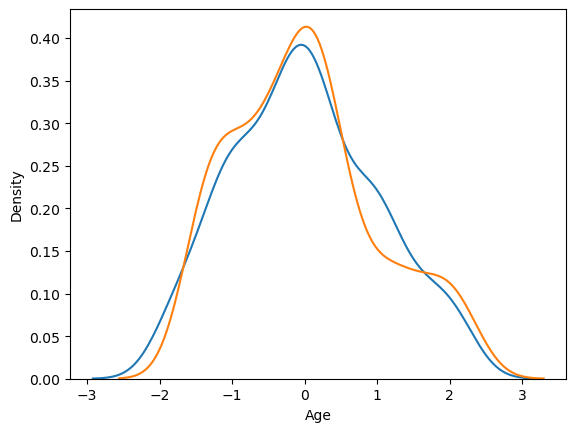

In [33]:
sns.kdeplot(data=X_train_scaled,x=X_train_scaled['Age'])
sns.kdeplot(data=X_train_scaled,x=X_train_scaled['EstimatedSalary'])

In [35]:
####  checking the mean and standard deviation of X_train data before scaling

np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


##### the mean is 37.9 and standard deviation is 10.2 for X_train data without scaling

In [37]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


##### the mean is 0 and standard deviation is 1 for X_train_scaled that mean we could normalize the data using standardization

## Effect of scalling

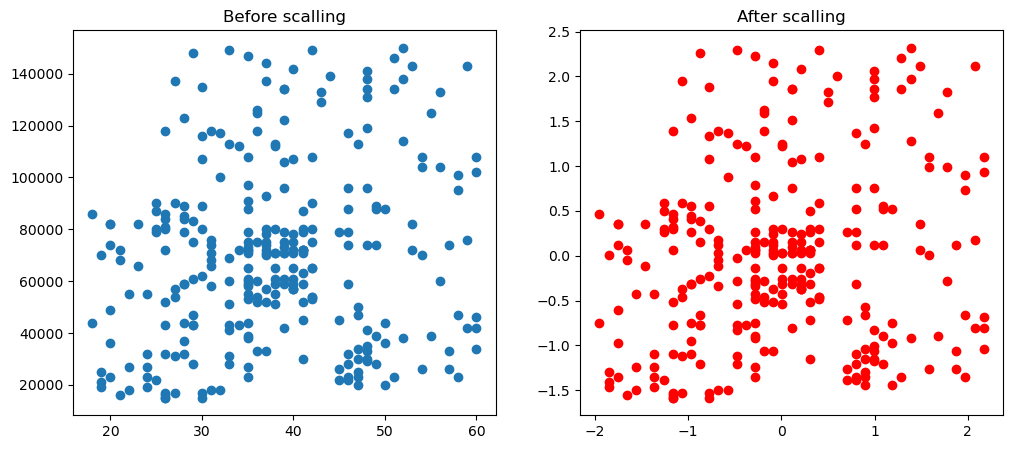

In [44]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before scalling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After scalling")
plt.show()

##### if you look at the scatter plot, the points are arranged in the similar fashion however the scale has been shifted.

### Now we will plot the KDE before scalling and after scalling

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

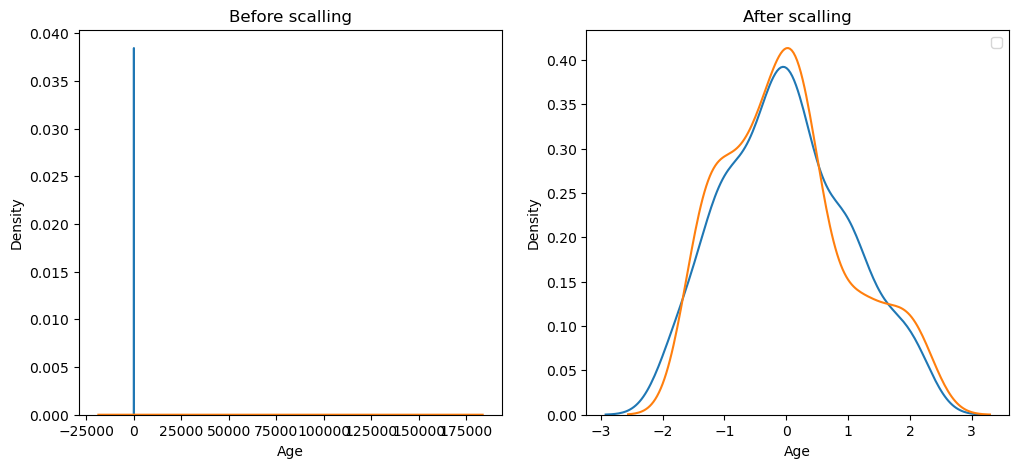

In [50]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(X_train['Age'],ax=ax1,legend='age')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax1.set_title("Before scalling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
ax2.set_title("After scalling")
plt.show()

## why scaling is important

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [53]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [54]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8916666666666667


#### the accuracy is improved for  the scaled data
- 89 percent for scaled data
- 65 percent for actaul 

### There is no effect of scaling on decision tree. We will learn more about this in decision tree section

## Effect of outlier

### There is no effect of scaling on outlier we need to handle outliers separately

## When to apply scaling

##### apply Scaling for below algorithms and models
- K means
- K-Nearest  Neighbours
- PCA
- Artifical Neural network
- Gradient Descent

##### you don't need apply scaling on below algo.
- Decision Tree
- Random Forest
- Gradient Boost
- XG Boost